<h3>Tejas Bhamare
</br></br>BA08
</br></br><center>Implement e-mail spam filtering using text classification algorithm with appropriate dataset.</center>    
</h3>

In [2]:
import nltk
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

In [3]:
dataset = pd.read_csv("spamLabels.csv")
dataset.drop(columns=['Unnamed: 0'], inplace=True)
dataset.head()

FileNotFoundError: [Errno 2] No such file or directory: 'spamLabels.csv'

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6046 entries, 0 to 6045
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    6045 non-null   object
 1   Label   6046 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 94.6+ KB


In [ ]:
dataset.isna().sum()

Body     1
Label    0
dtype: int64

In [ ]:
dataset.dropna(inplace=True)

In [ ]:
dataset.Label.value_counts()

Label
0    4150
1    1895
Name: count, dtype: int64

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(dataset['Body'], dataset['Label'], test_size=0.2)

print(xtrain.shape)
print(ytrain.shape, end="\n\n")
print(xtest.shape)
print(ytest.shape)

(4836,)
(4836,)

(1209,)
(1209,)


In [ ]:
count_vectorizer = CountVectorizer()

xtrain = count_vectorizer.fit_transform(xtrain)
xtest = count_vectorizer.transform(xtest)

In [ ]:
counter = 0

for i, j in count_vectorizer.vocabulary_.items():

    if counter == 25: break

    print(f"{i}: {j}")
    counter += 1

url: 58223
http: 29904
scriptingnews: 49841
userland: 58314
com: 16597
backissues: 11489
2002: 2472
09: 974
24: 3014
when: 60255
11: 1389
46: 4619
59am: 5319
date: 18905
tue: 56940
sep: 50278
18: 2085
59: 5282
gmtscoble: 27274
just: 33297
not: 40411
that: 55364
excited: 23714
by: 14178
much: 38867


In [ ]:
tfidf_transformer = TfidfTransformer()

xtrain = tfidf_transformer.fit_transform(xtrain)
xtest = tfidf_transformer.transform(xtest)

In [ ]:
model = MultinomialNB(alpha=0.05)

model.fit(xtrain, ytrain)

MultinomialNB(alpha=0.05)

In [ ]:
ypred = model.predict(xtest)

In [ ]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       839
           1       0.89      0.97      0.93       370

    accuracy                           0.95      1209
   macro avg       0.94      0.96      0.95      1209
weighted avg       0.96      0.95      0.95      1209



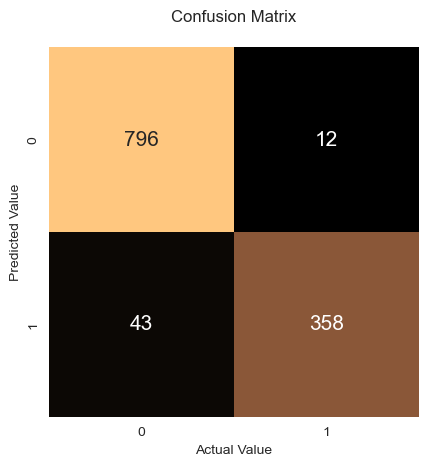

In [ ]:
sns.heatmap(pd.crosstab(ypred, ytest), cbar=False, annot=True, cmap='copper', fmt='d', square=True, annot_kws={'size':15})
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Confusion Matrix\n")
plt.show()